# Introduction to Tensorflow

## What is a computational Graph

Everything in TensorFlow comes down to building a computation graph. What is a computation graph? Its just a series of math operations that occur in some order. Here is an example of a simple computation graph:

![title](computation-graph.png)

This graph takes 2 inputs, (a, b) and computes an output (e). Each node in the graph is an operation that takes some input, does some computation, and passes its output to another node.
We could make this computation graph in TensorFlow in the following way:

In [7]:
import tensorflow as tf
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.add(a, b)
d = tf.subtract(b, 1)
e = tf.multiply(c, d)

Tensorflow uses tf.placeholder to handle inputs to the model. This is like making a reservation at a restaurant. The restaurant reserves a spot for 5 people, but you are free to fill those seats with any set of friends you want to. tf.placeholder lets you specify that some input will be coming in, of some shape and some type. Only when you run the computation graph do you actually provide the values of this input data. You would run this simple computation graph like this:

In [8]:
with tf.Session() as session:
    a_data, b_data = 3.0, 6.0
    feed_dict = {a: a_data, b: b_data}
    output = session.run([e], feed_dict=feed_dict)
    print(output) # 45.0

[45.0]


## Tensorflow - Constants

https://www.tensorflow.org/api_guides/python/constant_op#top_of_page

If the link doesn't work which it may not in the future due to constant development of Tensorflow just search for constants in the search bar of www.tensorflow.org


In [71]:
#tf.zeros_like(input_tensor, dtype=None, name=None, optimize=True)

a = tf.constant(2, name="a")
b = tf.constant(3, name="b")
x = tf.add(a, b, name="add")
with tf.Session() as sess:
    print (sess.run([x]) )

#tf.zeros(shape, dtype=tf.float32, name=None)

y= tf.zeros([2, 3], tf.int32)
with tf.Session() as sess:
    print (sess.run([y]) )

#tf.constant(value, dtype=None, shape=None,name='Const', verify_shape=False)

input_tensor= [[0, 1], [2, 3], [4, 5]]
z=tf.zeros_like(input_tensor)
with tf.Session() as sess:
    print (sess.run([z]))
    
#tf.fill(dims, value, name=None)
v= tf.fill([2,3], 9, name=None)
with tf.Session() as sess:
    print (sess.run([v]))

[5]
[array([[0, 0, 0],
       [0, 0, 0]])]
[array([[0, 0],
       [0, 0],
       [0, 0]])]
[array([[9, 9, 9],
       [9, 9, 9]])]


##  Tensorflow - Variables

https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/Variable

If the link doesn't work which it may not in the future due to constant development of Tensorflow just search for tf.Variable in the search bar of www.tensorflow.org


In [ ]:
# create variable a with scalar value
a = tf.Variable(2, name="scalar")
# create variable b as a vector
b = tf.Variable([2, 3], name="vector")
# create variable c as a 2x2 matrix
c = tf.Variable([[0, 1], [2, 3]], name="matrix")
# create variable W as 784 x 10 tensor, filled with zeros
W = tf.Variable(tf.zeros([784,10]))

# you have to initialize a variable

# Global initializer initializes all the variables you have defined in the graph
init = tf.global_variables_initializer()
with tf.Session() as sess:
sess.run(init)

# If you want to initialize a subset of variables
init_ab = tf.variables_initializer([a, b], name="init_ab")
with tf.Session() as sess:
sess.run(init_ab)


# W is a random 700 x 100 variable object, use Variable.evak() to print the values of W directly instead of storing in some 
# temp variable
W = tf.Variable(tf.truncated_normal([700, 10]))
with tf.Session() as sess:
sess.run(W.initializer)
print W.eval()


# Exercise 1 
W = tf.Variable(10)
W.assign(100)
with tf.Session() as sess:
sess.run(W.initializer)
print W.eval()  # >> ?


# Exercise 2
W = tf.Variable(10)
sess1 = tf.Session()
sess2 = tf.Session()
sess1.run(W.initializer)
sess2.run(W.initializer)
print sess1.run(W.assign_add(10)) #  # >> ?
print sess2.run(W.assign_sub(2)) # >> ?

## Tensorflow - Interactive Session

In [ ]:
sess = tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
# We can just use 'c.eval()' without specifying the context 'sess'
print(c.eval())
sess.close()

## Tensorflow - Placeholders

In [ ]:
# tf.placeholder(dtype, shape=None, name=None)

# Placeholders are used to generalize our model so that we can feed in any data to our computational graph. Because Tensorflow
# is a declarative framework we don't need to know the data for assembling the graph. The data can be fed using feed_dict at a
# later stage

# create a placeholder of type float 32-bit, shape is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, shape is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
# use the placeholder as you would a constant or a variable
c = a + b # Short for tf.add(a, b)

with tf.Session() as sess:
print sess.run(c) # Error because a doesn’t have any value

In [ ]:
# create a placeholder of type float 32-bit, shape is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, shape is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
# use the placeholder as you would a constant or a variable
c = a + b # Short for tf.add(a, b)

with tf.Session() as sess:
# feed [1, 2, 3] to placeholder a via the dict {a: [1, 2, 3]}
# fetch value of c
print sess.run(c, {a: [1, 2, 3]}) # the tensor a is the key, not the string ‘a’

## Putting it all together and building a toy Neural Network

We use feed_dict to pass in the actual input data into the graph. We use session.run to get the output from the c operation in the graph. Since e is at the end of the graph, this ends up running the entire graph and returning the number 45 - cool!

Neural Networks in Tensorflow
We can define neural networks in TensorFlow using computation graphs. Here is an example, very simple neural network (just 1 perceptron):

![title](computation-graph-2.png)

In [9]:
# import libraries
import tensorflow as tf
import numpy as np


# define a computation graph to run a simple one layer neural network

n_input_nodes = 2
n_output_nodes = 2

x = tf.placeholder(tf.float32, (None, n_input_nodes))
W = tf.Variable(tf.ones((n_input_nodes, n_output_nodes)), dtype=tf.float32)
b = tf.Variable(tf.zeros(n_output_nodes), dtype=tf.float32)
z = tf.matmul(x, W) + b

y_true = tf.placeholder(tf.float32, [None, n_output_nodes])
y_true_cls = tf.placeholder(tf.int64, [None])

y_pred = tf.nn.softmax(z)
y_pred_cls = tf.argmax(y_pred, dimension=1)


# define the training and accuracy metrics for the network

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=z)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




In [10]:
# test out the network for a sample input
test_input = [[0.5, 0.5]]
with tf.Session() as session:
    tf.global_variables_initializer().run(session=session)
    feed_dict = {x: test_input}
    output = session.run([y_pred_cls], feed_dict=feed_dict)
    print(output)

[array([0], dtype=int64)]


Optimization Finished!
Predictions with 5 epochs



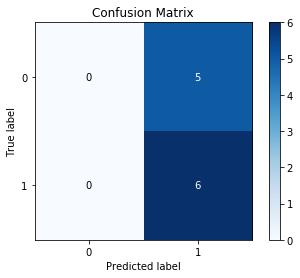

Optimization Finished!
Predictions with 50 epochs



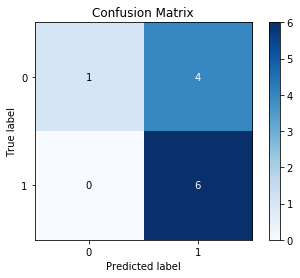

Optimization Finished!
Predictions with 100 epochs



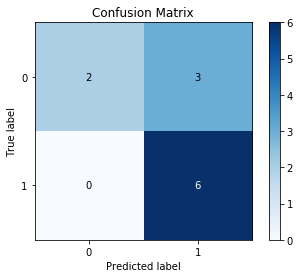

Optimization Finished!
Predictions with 500 epochs



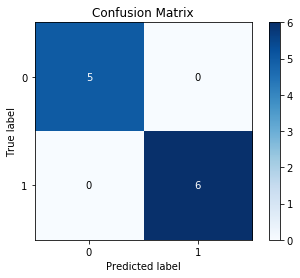

In [62]:
#create dummy data
data = np.array([[2, 7], [1, 7], [3, 1], [3, 3], [4, 3], [4, 6], [6, 5], [7, 7], [7, 5], [2, 4], [2, 2]])
y = np.array([[0,1], [0,1], [1,0], [1,0], [1,0], [0,1], [0,1], [0,1], [0,1], [1,0], [1,0]])
cls = np.argmax(y, axis =1)
feed_dict_test = {x: data,y_true: y}

# import ploting libraries
import scikitplot as skplt
import matplotlib.pyplot as plt

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
training_epochs_choices = [5,50,100,500]
BATCH_SIZE = 2
for training_epochs in training_epochs_choices:
    # Start training
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)

        # Training cycle
        for epoch in range(training_epochs):
            #print("Running epoch: " + str(epoch))
            train_count = len(data)
            for start, end in zip(range(0, train_count, BATCH_SIZE),range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
                sess.run([optimizer], feed_dict={x: data[start:end],y_true: y[start:end]})

        print("Optimization Finished!")
        predictions = (sess.run(y_pred_cls,feed_dict ={x:data} ))
        print("Predictions with "+ str(training_epochs) + " epochs\n")
        skplt.metrics.plot_confusion_matrix(y_true=cls, y_pred=predictions)
        plt.show()     

## Tensorflow - Saving Models

A good practice is to periodically save the model’s parameters after a certain number of steps so that we can restore/retrain our model from that step if need be. The tf.train.Saver() class allows us to do so by saving the graph’s variables in binary files.

In [ ]:
# define model


# create a saver object
saver = tf.train.Saver()

# launch a session to compute the graph
with tf.Session() as sess:
    # actual training loop
    for step in range(training_steps):
        sess.run([optimizer])
        if (step + 1) % 1000==0:
            saver.save(sess, 'checkpoint_directory/model_name',global_step=model.global_step)
